#### Create an “Academic performance” dataset of students and perform the following operations using Python. transformation should be one of the following reasons: to change the scale for better
#### 1.Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.

#### 2.Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.

#### 3.Apply data transformations on at least one of the variables. The purpose of this: understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution. Reason and document your approach properly.

#### Dataset details: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

In [4]:
pip install numpy pandas seaborn matplotlib

You should consider upgrading via the '/Users/niranjan/Documents/venv/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Renaning Columns :

In [7]:
df = df.rename(columns = {
    "race/ethnicity" : "race",
    "parental level of education" : "parent_edu",
    "test preparation course" : "test_course",
    "math score" : "math_score",
    "reading score" : "reading_score",
    "writing score" : "writing_score"
});
df

,gender,race,parent_edu,lunch,test_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


#### 1.Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.

#### 1.1 Checking for null values

In [8]:
df.isnull().sum()

gender           0
race             0
parent_edu       0
lunch            0
test_course      0
math_score       0
reading_score    0
writing_score    0
dtype: int64

#### 2.Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.

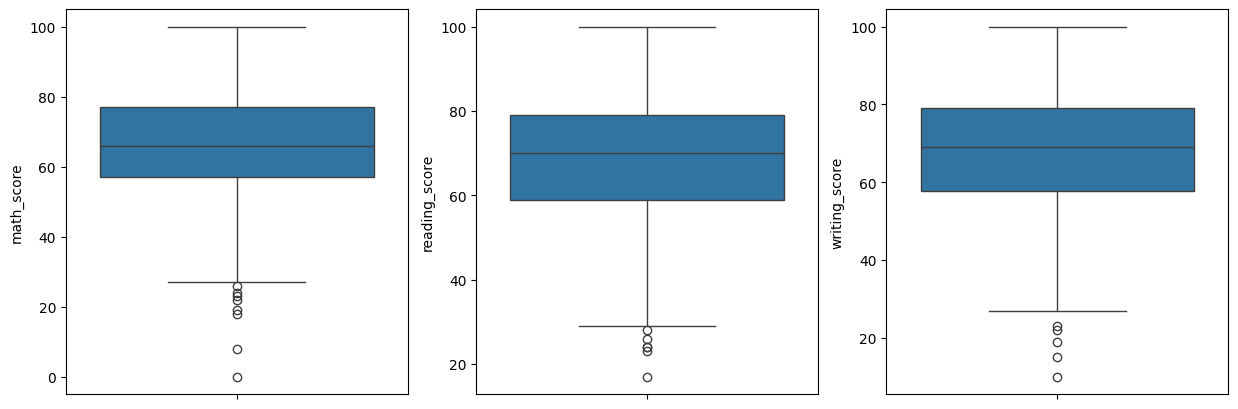

In [9]:
fig,axes = plt.subplots(1,3,figsize = (15,5));

sns.boxplot(data = df["math_score"], ax = axes[0]);
sns.boxplot(data = df["reading_score"], ax = axes[1]);
sns.boxplot(data = df["writing_score"], ax = axes[2]);

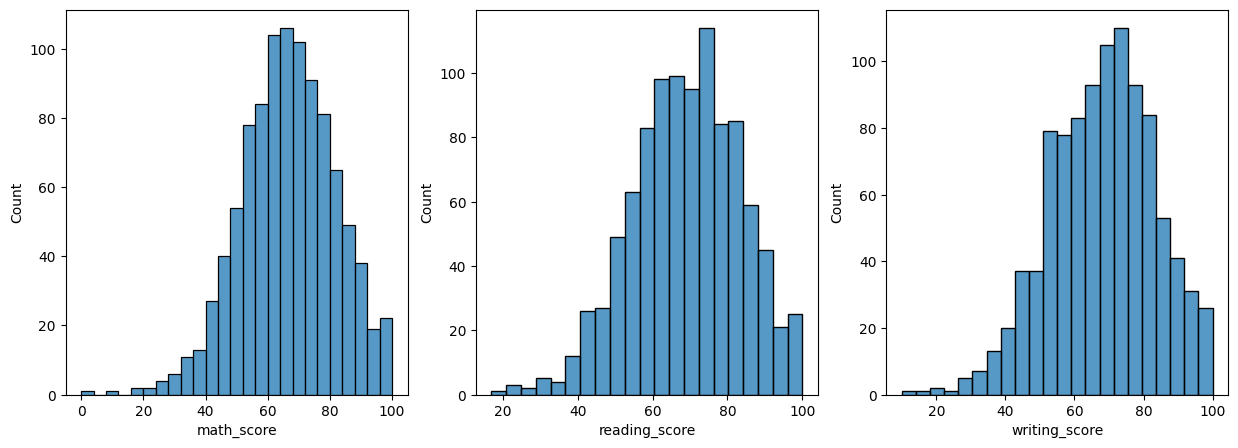

In [10]:
fig,axes = plt.subplots(1,3,figsize = (15,5));

sns.histplot(data = df["math_score"], ax = axes[0]);
sns.histplot(data = df["reading_score"], ax = axes[1]);
sns.histplot(data = df["writing_score"], ax = axes[2]);

In [11]:
df["math_score"].skew()

np.float64(-0.27893514909431694)

In [12]:
df["reading_score"].skew()

np.float64(-0.25910451810923063)

In [13]:
df["writing_score"].skew()

np.float64(-0.28944397150761897)

In [14]:
def remove_outliers(feature):
    global df
    q3,q1 = np.percentile(df[feature],[75,25]);
    iqr = q3 - q1
    df = df[(df[feature] <= q3 + 1.5 * iqr ) & (df[feature] >= q1 - 1.5 * iqr)]

In [15]:
remove_outliers("math_score");
remove_outliers("reading_score");
remove_outliers("writing_score");

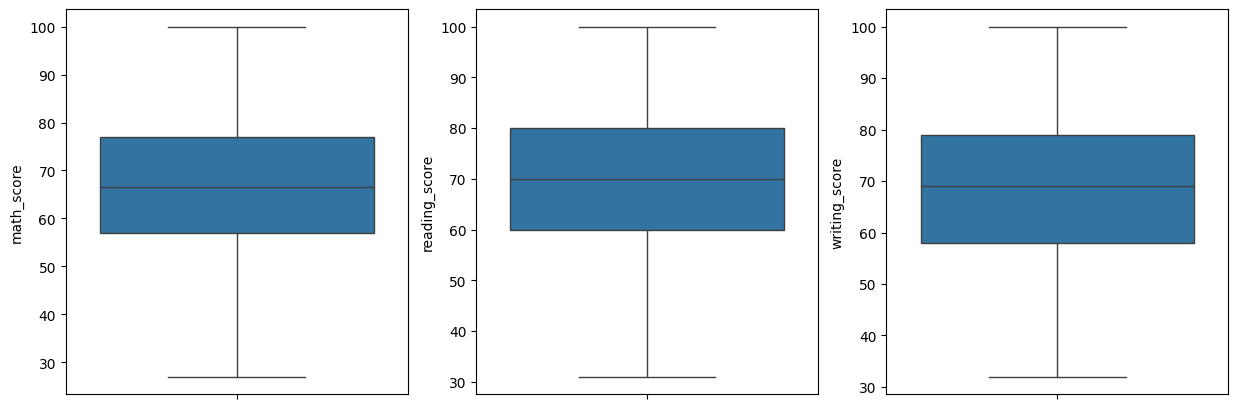

In [16]:
fig,axes = plt.subplots(1,3,figsize = (15,5));

sns.boxplot(data = df["math_score"], ax = axes[0]);
sns.boxplot(data = df["reading_score"], ax = axes[1]);
sns.boxplot(data = df["writing_score"], ax = axes[2]);

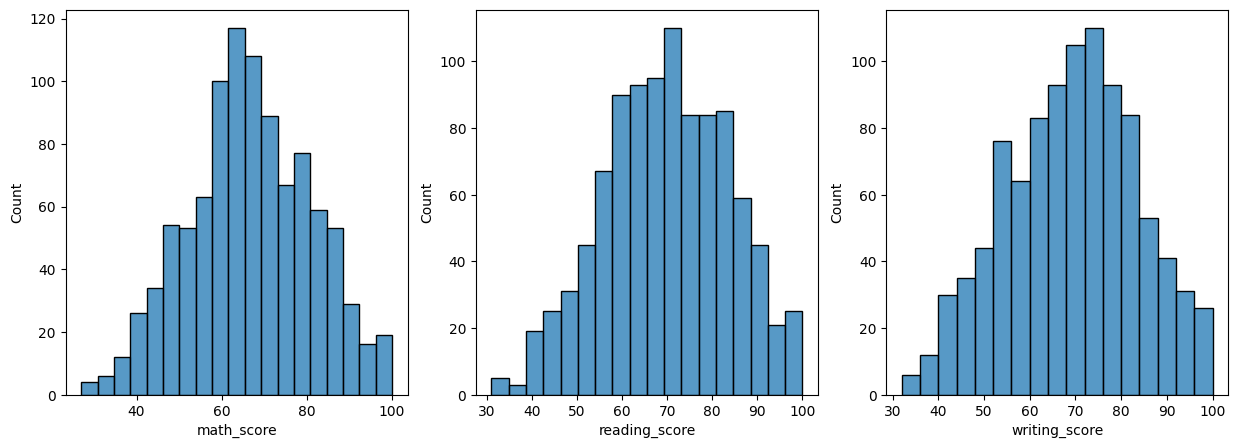

In [17]:
fig,axes = plt.subplots(1,3,figsize = (15,5));

sns.histplot(data = df["math_score"], ax = axes[0]);
sns.histplot(data = df["reading_score"], ax = axes[1]);
sns.histplot(data = df["writing_score"], ax = axes[2]);

In [18]:
df["math_score"].skew()

np.float64(-0.02597374258403439)

In [19]:
df["reading_score"].skew()

np.float64(-0.07767102775431023)

In [20]:
df["writing_score"].skew()

np.float64(-0.08436233633379218)

#### 3.Apply data transformations on at least one of the variables. The purpose of this: understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution. Reason and document your approach properly.

#### 3.1 Encoding Categorial Data

In [21]:
def encode_categorial(feature):
    values = df[feature].unique();
    label = 0
    for val in values:
        df.loc[df[feature] == val,feature] = label
        label += 1
encode_categorial("gender");
encode_categorial("race");
encode_categorial("parent_edu");
encode_categorial("lunch");
encode_categorial("test_course");

#### 3.2 Normalizing Numerical Features

In [22]:
def zscore(feature):
    df[feature] = ( df[feature] - df[feature].mean() ) / df[feature].std();
zscore("math_score");
zscore("reading_score");
zscore("writing_score");

In [23]:
df

,gender,race,parent_edu,lunch,test_course,math_score,reading_score,writing_score
0,0,0,0,0,0,0.369943,0.163678,0.370964
1,0,1,1,0,1,0.160750,1.457644,1.341360
2,0,0,2,0,0,1.625105,1.817079,1.687930
3,1,2,3,1,0,-1.373337,-0.914627,-1.708457
4,1,1,1,0,0,0.648868,0.595000,0.440278
...,...,...,...,...,...,...,...,...
995,0,4,2,0,1,1.485643,2.104627,1.826558
996,1,1,4,1,0,-0.327369,-1.058402,-0.946003
997,0,1,4,1,1,-0.536563,0.091791,-0.252863
998,0,3,1,0,1,0.091018,0.595000,0.578906


In [24]:
df.describe()

,math_score,reading_score,writing_score
count,9.860000e+02,9.860000e+02,9.860000e+02
mean,-4.612042e-16,-9.728526e-17,-7.206316e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.767961e+00,-2.783690e+00,-2.540226e+00
25%,-6.760250e-01,-6.989664e-01,-7.380609e-01
50%,-1.357849e-02,1.990381e-02,2.439348e-02
75%,7.185992e-01,7.387740e-01,7.175338e-01
max,2.322417e+00,2.176515e+00,2.173129e+00


####  Log‐Transform to Reduce Skewness (Data is not that skewed so not needed)

In [25]:
print("Skew before : ", df["math_score"].skew());
df["log_score"] = np.log1p(df["math_score"]);
print("Skew after : ", df["log_score"].skew());

Skew before :  -0.025973742584033038
Skew after :  -1.4901852948247267


/Users/niranjan/Documents/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
